# Milestone 02 - Phase 2 - FTDS (Offline)

## I. Introduction

- Name: Radyatra Sidharta
- Batch: 001-HCK

Milestone 2 is created to evaluate learning done in the Hacktiv8 Data Science Full Time Program Phase 2, with a focus on Deep Learning.

Students are welcome to choose a topic between Computer Vision or Natural Language Processing, using their own dataset (scraping by students) or using an open dataset.

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Problem Description
    - c. Objective
    - d. Problem Statement

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)

- V. Data Preprocessing
    - a. Dataset Splitting
    - b. Category Balance Visualization
    - c. Augmentation

- VI. Model Definition

- VII. Model Training

- VIII. Model Evaluation

- IX. Model Improvement
    - a. Base Model
        - 1. Base Model Improvement Version 01
        - 2. Base Model Improvement Version 02
        - 3. Base Model Improvement Version 03
        - 4. Base Model Improvement Version 04
        - 5. Closing Statement

    - b. Pretrained Model

- X. Model Inference  

- XI. Model Saving

- XII. Conclusion & Recommendation

### b. Problem Description

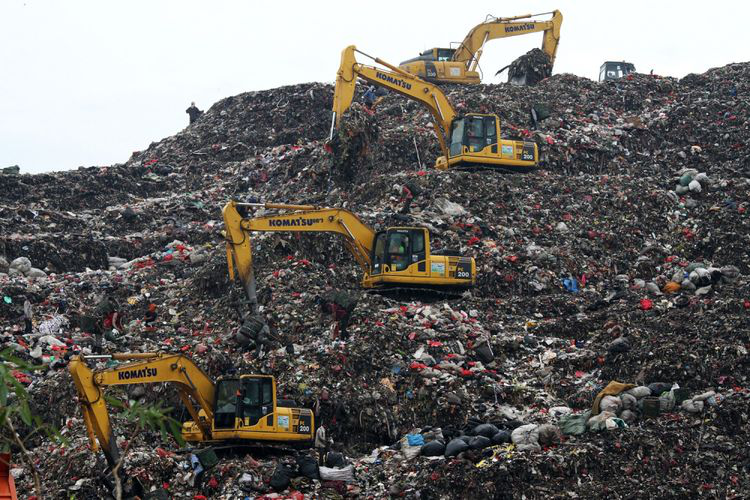

In [75]:
pd1 = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\waste_site.jpg')
pd1

Indonesia, just as the rest of the world, has its own share of waste management problems. The amount and type of waste always increases by population and technology growth. However, the promptness of waste management solutions are left behind. Such is the alarmness of the problems that an incident happened on February 21st, 2005, where a waste explosion occured in Leuwigajah Waste Processing Center located in Cimahi, West Java that caused a waste slide, burying 2 villages. As a consequence, 157 people were found dead.

Reference: https://bit.ly/3T9bLn1

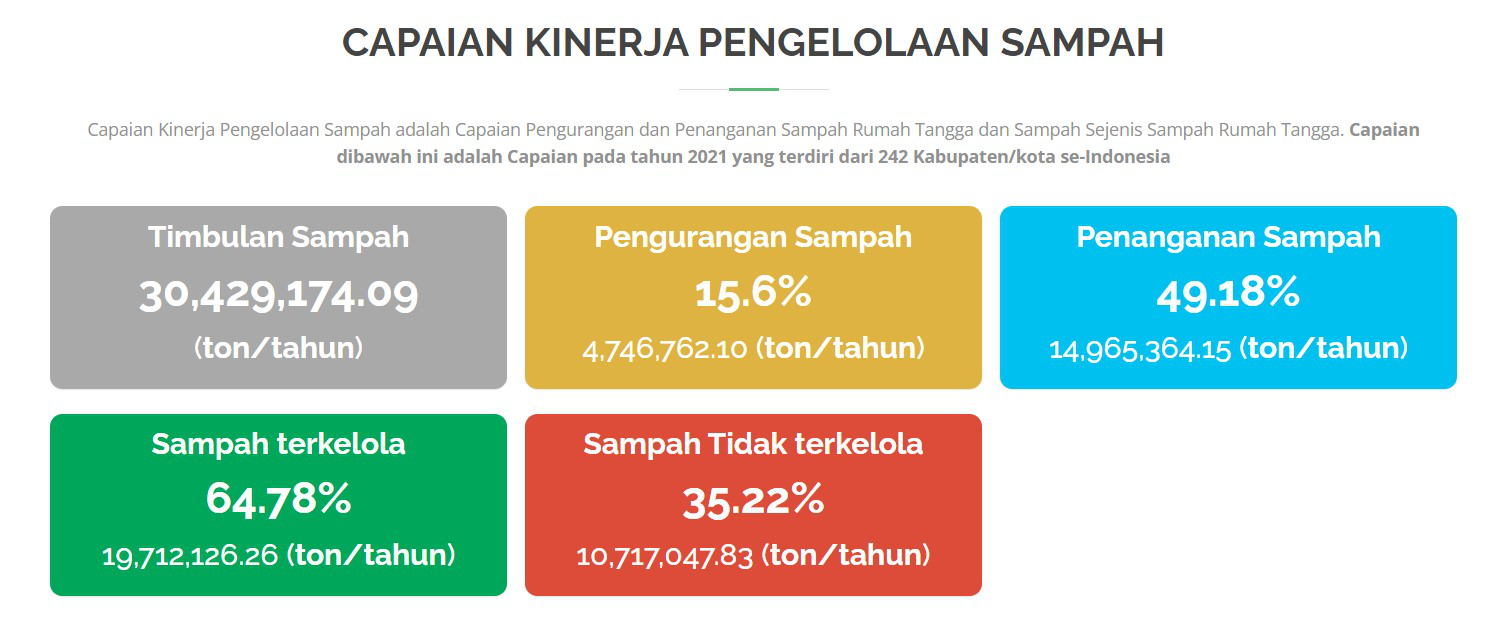

In [77]:
pd2 = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\waste_stat_ind.jpg')
pd2

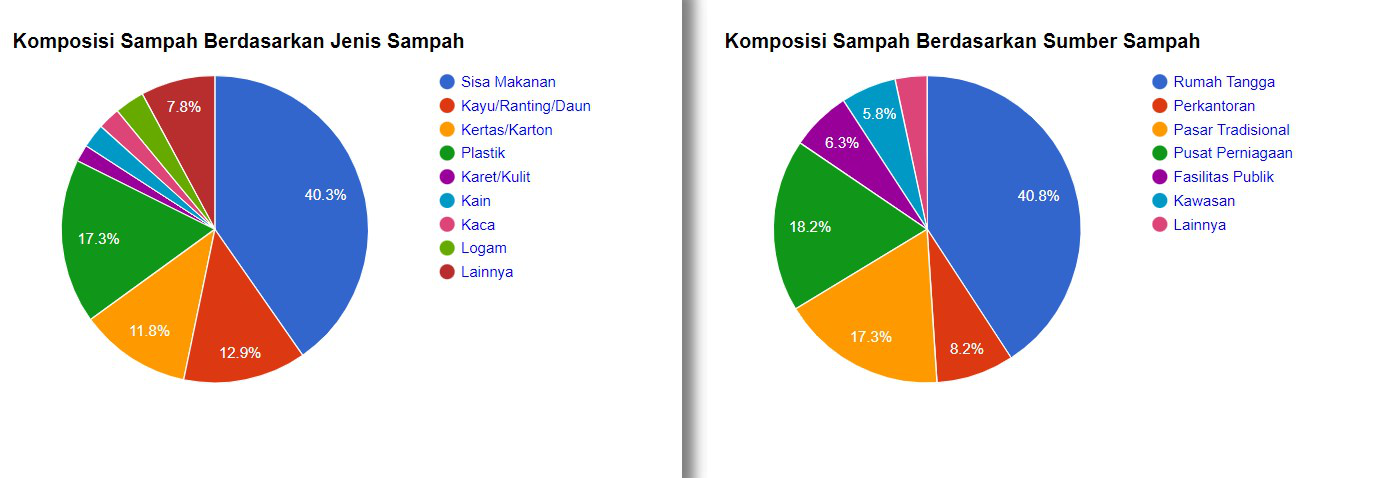

In [79]:
pd3 = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\waste_pie_ind.jpg')
pd3

Image Reference: https://bit.ly/3s6YWh7

Waste production in Indonesia reaches 30.4 million tonnes each year, with only half of that being able to be contained, and a staggering 35% not being able to be processed in the facilities. With uncertainty on the procedure of how these wastes are treated (evident from the image of the pile of waste above), a new management system is urgently needed. However, at first glance, this is no easy task. Different types of wastes have different approaches in regards to the way they are handled / treated. Before the work on removal / recycling is done to them, we would need a system that can categorize and seperate these differing types of waste. As such, Deep Learning can now come into play, in the form of a Convolutional Neural Network.

Only after this is done may other concurrent and following processes be made, and implented that would, hopefully, see Indonesia step into a cleaner future.

### c. Objective

Create a Convolutional Neural Network / Computer Vision model that is able to distinguish or categorize images of waste.

### d. Problem Statement

There is a need for a waste categorization through the processing of image samples to be used in small to large scale projects. The categories of waste will include the following: Cardboard, Glass, Metal, Paper, Plastic, and Trash (Other Waste). Therefore, a Computer Vision model, using a Convolutional Neural Network, is needed to enable this process.

## II. Library Import

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import tensorflow as tf
import os
import glob
from PIL import Image
import cv2

import warnings
warnings.filterwarnings('ignore')

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# For Preprocessing
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# For Model
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score, roc_curve,precision_score, recall_score, f1_score

np.random.seed(2)
tf.random.set_seed(2)

In [2]:
# Checking the number of GPUs available for use in model training.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Checking the tensorflow-gpu version and whether another version is required or not.
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.10.0


In [4]:
# Checking the CPU and GPU capabilities.
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10634315050690376925
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1735917568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 392380965765701841
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## III. Data Loading

The dataset comprises of images of waste that have been split into six categories, namely: Cardboard, Glass, Metal, Paper, Plastic, and Trash. Here, we will be loading these images and converting them into a dataframe for ease of use.

In [5]:
# Defining the data for ease of use during recall.
dataset = r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\Garbage classification'

In [6]:
# Preparing each of our categories for conversion into dataframe.
df_cb = glob.glob(dataset+'/cardboard/*.jpg')
df_gls = glob.glob(dataset+'/glass/*.jpg')
df_met = glob.glob(dataset+'/metal/*.jpg')
df_pap = glob.glob(dataset+'/paper/*.jpg')
df_pla = glob.glob(dataset+'/plastic/*.jpg')
df_tra = glob.glob(dataset+'/trash/*.jpg')

In [7]:
# Defining conversion process.
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        data.append((image, image.split('/')[1].split('\\')[0]))
    return pd.DataFrame(data, columns=['images', 'label'])

In [8]:
# Converting data into dataframe.
df = create_dataframe(df_cb + df_gls + df_met + df_pap + df_pla + df_tra)
df = df.sample(frac=1, random_state=2).reset_index(drop=True)

In [9]:
df

images    label
0     C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    paper
1     C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    metal
2     C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    metal
3     C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    metal
4     C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...  plastic
...                                                 ...      ...
2522  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    trash
2523  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    metal
2524  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    trash
2525  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...  plastic
2526  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    paper

[2527 rows x 2 columns]

From the table above, we could ascertain that our data has been successfully converted to a dataframe, in which our image path is listed on the column "images" and its category in the column "label."

## IV. Exploratory Data Analysis (EDA)

In [10]:
# Reconfirming the categories of our images.
os.listdir(dataset)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [11]:
# Counting the number of images in each category.
waste_cat = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
for label in waste_cat:
    directory = os.path.join(dataset, label)
    print("Images in Category \"" + label + "\":\t", len(os.listdir(directory)))

Images in Category "cardboard":	 403
Images in Category "glass":	 501
Images in Category "metal":	 410
Images in Category "paper":	 594
Images in Category "plastic":	 482
Images in Category "trash":	 137


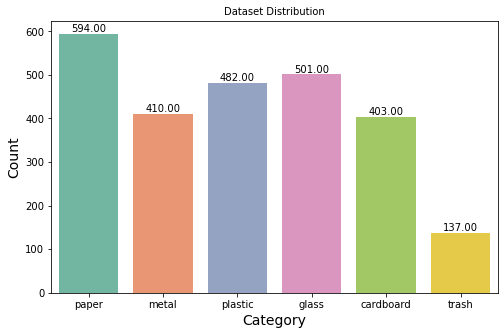

In [12]:
# Visualizing the count from the list above.
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    plt.xlabel('Category', size=14)
    plt.ylabel('Count', size=14)
    plt.title(f'{label} Distribution', size=10)
    plt.show()

visualize_data(df, 'Dataset')

In [13]:
print((137/(403+501+410+594+482+137))*100, '%')

5.4214483577364465 %


Observing the bar graph above, we could ascertain that we have the most images on paper, at 594 images. With most of the other categories not far behind at about 400 - 500 images each, the data is balanced enough for the model to be able to learn and predict well. However, when it comes to the category "trash", the model may struggle in being able to identify mentioned category as the qunatity of images for it to train with sits at only about 5% of the entirety of the data. Not to mention, our dataframe here has not yet been split into the following Train, Validation, and Test sets (which will be discussed in further chapters).

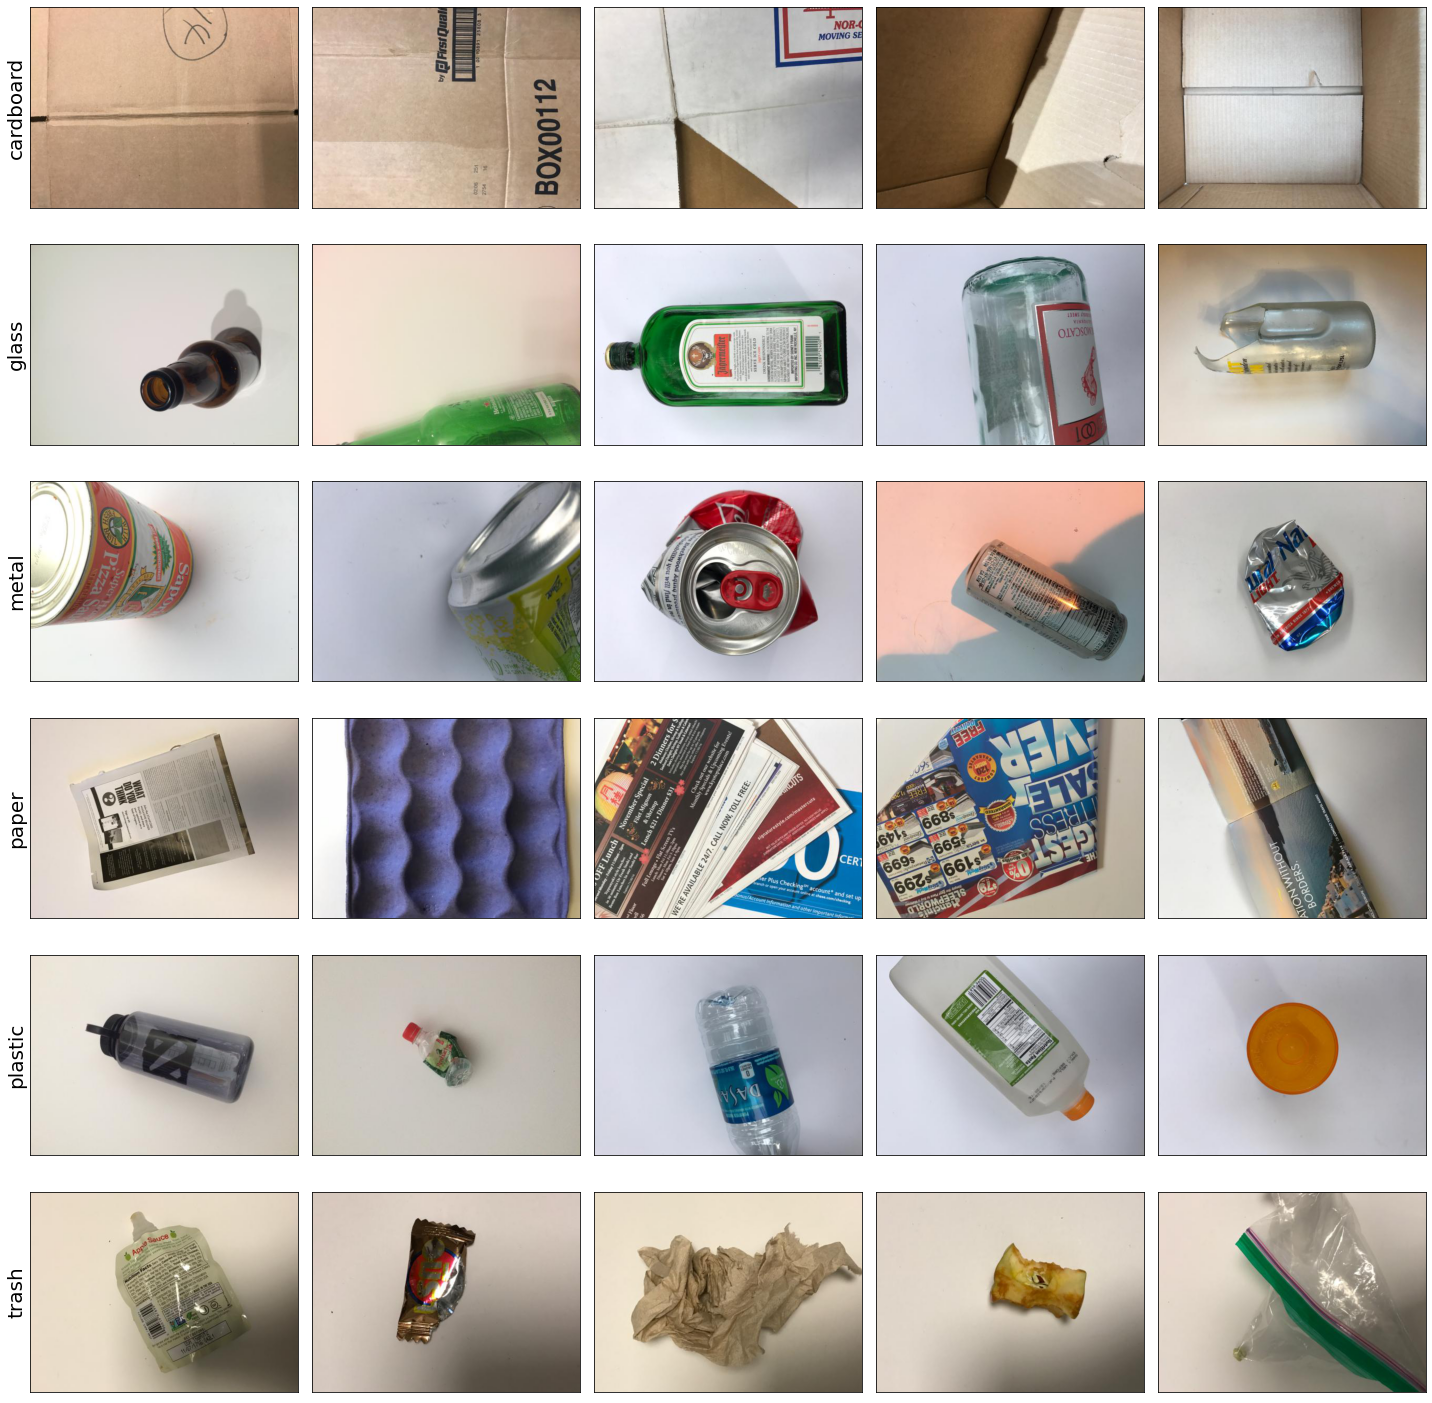

In [14]:
# Visualizing samples of images in each category (5 each).
plt.figure(figsize=(20,20))

for i in range(6):
    directory = os.path.join(dataset, waste_cat[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 5, i*5 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(waste_cat[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout()
plt.show()

From the sample images above, we could ascertain the distinct features each waste categories offer in detail, where it offers us a glimpse of what our model would train on. However, here we could observe that the category "trash" seem to have an assortment of waste, hinting that it is a category in which these objects cannot be labelled as the other types we have, or that they could not be accurately distinguished as those other types. 

Therefore, we must assume that "trash" is a category for a mixture waste besides the five categories we have that are:
- Cardboard
- Glass
- Metal
- Paper
- Plastic

## V. Data Preprocessing

In [15]:
# Defining set parameters for our models. 
seed_num = 2
img_width = 224
img_height = 224
batch_num = 128

These set parameters will be used as the standard for all our models to follow.

### a. Dataset Splitting

The purpose of splitting our data is to prepare them for input into our models. The standard shape they must fulfill is to be split into three sets: Train, Validation and Test. 

The Train Set will be used to "train" or allow our model to learn about our data. Afterwards, its performance would be "validated" with the Validation Set, in which the first instances / trend of our model could be observed. This observation could then be used to tweak and improve the model's performance along with the evaluation from applying the model to our Test Set.

Essentially, the validation and test sets are similar in purpose but are used a little differently for our model evaluation.

In [16]:
# Splitting dataframe between Train Set and Test Set.
X_train_full, X_test,  = train_test_split(df, train_size=0.8)

# Ascertaining the number of samples / data entries in each of our sets.
print('X_Train Size : ', X_train_full.shape)
print('X_Test Size  : ', X_test.shape)

X_Train Size :  (2021, 2)
X_Test Size  :  (506, 2)


In [17]:
# Resplitting our train set to the final Train and Validation sets.
X_train, X_val = train_test_split(X_train_full, train_size=0.9)

print('X_Train Size : ', X_train.shape)
print('X_Validation Size  : ', X_val.shape)

X_Train Size :  (1818, 2)
X_Validation Size  :  (203, 2)


### b. Category Balance Visualization

The purpose of this visualization is to highlight the count of the images we have in each category and each sets. No data preprocessing steps are done here.

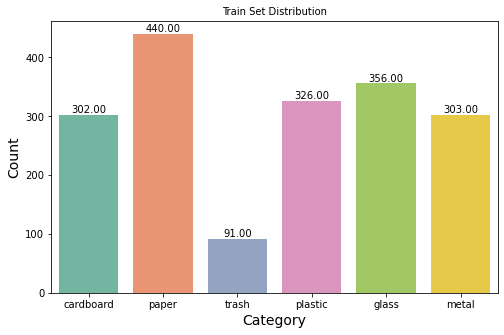

In [18]:
# Bar graph for our the count of images in each category in our Train Set.
visualize_data(X_train, 'Train Set')

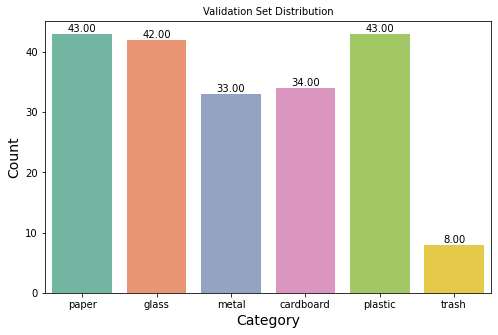

In [19]:
# Bar graph for our the count of images in each category in our Validation Set.
visualize_data(X_val, 'Validation Set')

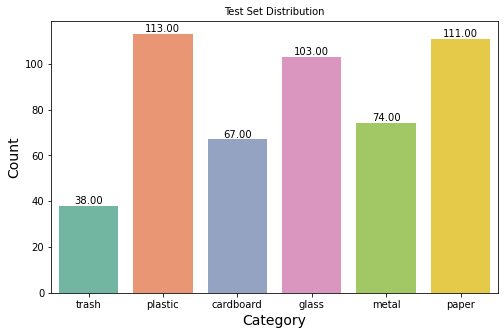

In [20]:
# Bar graph for our the count of images in each category in our Test Set.
visualize_data(X_test, 'Test Set')

As observed last time in our Exploratory Data Analysis, we could see that the category "trash" has the least samples in every set we have.

### c. Augmentation

Augmentation allows us to apply different kinds of changes to our images for the model to train on. This is used so that our model would have a certain "flexibility" and an increased ability to identify and accurately classify images. 

To clarify, suppose we have a model that can classify bottles in an image. If we trained our model on an image of a bottle pointing upwards, it will be able to classify a similar image but ONLY if the bottle in these other images are pointing upwards also. It would be silly then if someone were to use our model, they would have to consistently make sure that the bottles in their images are pointing upwards. Therefore, in an effort to decrease our model's shortcomings, we could augment our sample images in an effort to allow our model to "meet" and train on images from different angles, zoom levels, and that of different width and heights, etc.

Note that we would only be augmenting the images in our train set, since our validation and test sets are used to evaluate the model, which would mean that their original shape would need to be intact to obtain a realistic performance from our model.

In [21]:
# Defining the augmentation and rescaling settings for our train set.
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Defining the rescaling settings for our Validation and Test sets. 
val_aug = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

In [22]:
# Applying the augmentation and rescaling to our Train Set images.
df_train_aug = train_aug.flow_from_dataframe(
    dataframe=X_train,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=True,
    seed=seed_num)

# Applying the rescaling to our Validation Set images.
df_val_aug = val_aug.flow_from_dataframe(
    dataframe=X_val,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=False,
    seed=seed_num)

# Applying the rescaling to our Test Set images.
df_test_aug = test_aug.flow_from_dataframe(
    dataframe=X_test,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=False,
    seed=seed_num)

Found 1818 validated image filenames belonging to 6 classes.
Found 203 validated image filenames belonging to 6 classes.
Found 506 validated image filenames belonging to 6 classes.


## VI. Model Definition

The model definition is the first step in creating our Convolutional Neural Network (CNN). Here we create the CNN architecture, where we define the number of layers as well as set their parameters. As a standard, these layers would include the Input, then Convolutional / Filter layer, followed by the Pooling, Flattening, Hidden, and lastly Output layer. 

Reference: https://bit.ly/3rYT6yn

In [23]:
# Defining number of output neurons.
num_classes = 6

In [24]:
# Model architecture
model = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [25]:
# Compiling model before training. This used to configure the training parameters.
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Visualizing the architecture for our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

## VII. Model Training

A Deep Neural Network uses backpropagation algorithm by going from the output layer to the input layer, propagating the error gradient along the way. This algorithm computes the gradient of the cost function with regard to each parameter in the network, it then uses these gradients to update each parameter with a Gradient Descent step. One cycle of this backpropagation is defined to be one epoch.

Reference: https://bit.ly/3ezNw2m

In [27]:
# Training our model with a defined number of epochs.
epochs=20

history = model.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs
)

Epoch 1/20
15/15 [==============================] - 25s 1s/step - loss: 1.9283 - accuracy: 0.1947 - val_loss: 1.6724 - val_accuracy: 0.2118
Epoch 2/20
15/15 [==============================] - 15s 1s/step - loss: 1.6179 - accuracy: 0.3383 - val_loss: 1.4304 - val_accuracy: 0.4236
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 1.5049 - accuracy: 0.3828 - val_loss: 1.4262 - val_accuracy: 0.4039
Epoch 4/20
15/15 [==============================] - 15s 1s/step - loss: 1.4060 - accuracy: 0.4378 - val_loss: 1.3344 - val_accuracy: 0.4384
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 1.3330 - accuracy: 0.4620 - val_loss: 1.3683 - val_accuracy: 0.4335
Epoch 6/20
15/15 [==============================] - 15s 1s/step - loss: 1.3051 - accuracy: 0.4791 - val_loss: 1.2644 - val_accuracy: 0.4631
Epoch 7/20
15/15 [==============================] - 15s 1s/step - loss: 1.2416 - accuracy: 0.5055 - val_loss: 1.2323 - val_accuracy: 0.5419
Epoch 8/20
15/15 [==

In [28]:
# Freezing the model to disallow training of this particular model in concurrent steps.
model.trainable = False

## VIII. Model Evaluation

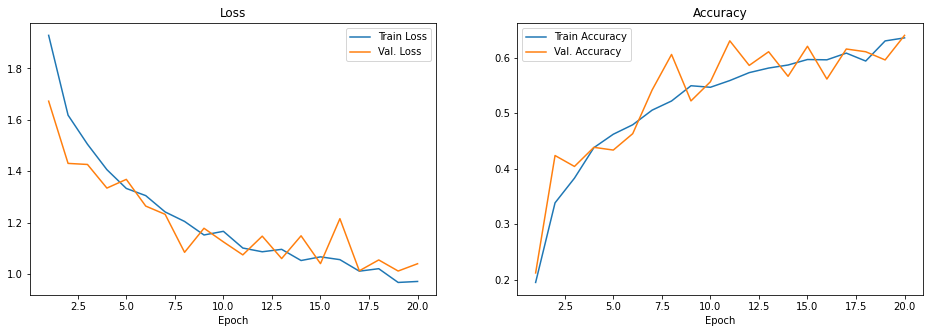

In [29]:
# Model Loss and Accuracy visualization.
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

From the graph above, we can observe that there is a minor exploding gradient problem for the validation loss and accuracy.

In [41]:
val_results = model.evaluate(df_test_aug, verbose=0)
print(f'Validation Loss - Sequential API : {val_results[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results[1]:.4f}')
print('')
test_result = model.evaluate(df_test_aug)
print('Test Loss - Sequential API : ', test_result[0])
print('Test Accuracy - Sequential API : ', test_result[1])

Validation Loss - Sequential API : 1.0495
Validation Accuracy - Sequential API : 0.6502

4/4 [==============================] - 1s 246ms/step - loss: 1.0495 - accuracy: 0.6502
Test Loss - Sequential API :  1.0495349168777466
Test Accuracy - Sequential API :  0.6501976251602173


Here, we can see the final Loss and Accuracy scores for both the Validation and Test sets. A loss of 1 is still considered to be large as we aim to go below 0.5. The test accuracy is also still quite low at only 65%. However, from the two graphs we have above, it would seem that the model could still improve if we increase the number of epochs.

In [31]:
# Copying test dataframe for .predict.
test_eva=X_test.copy()

In [32]:
# Outputting the unique values in our target column as well as its default index number.
df_test_aug.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [33]:
# Changing the names of the waste category into numbers following the index numbers given above.
test_eva.loc[test_eva['label']== 'cardboard', 'label'] = 0
test_eva.loc[test_eva['label']== 'glass', 'label'] = 1
test_eva.loc[test_eva['label']== 'metal', 'label'] = 2
test_eva.loc[test_eva['label']== 'paper', 'label'] = 3
test_eva.loc[test_eva['label']== 'plastic', 'label'] = 4
test_eva.loc[test_eva['label']== 'trash', 'label'] = 5
# Note that the output of these numbers will be in float type.

In [34]:
# Converting float numbers to integer. 
test_eva['label'] = test_eva['label'].astype(int)
test_eva.dtypes

images    object
label      int32
dtype: object

In [35]:
# Pulling out original dataframe for comparison.
X_test

images      label
1873  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      trash
1098  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      trash
953   C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    plastic
1054  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      trash
2223  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...  cardboard
...                                                 ...        ...
1559  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...    plastic
272   C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      paper
2150  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      metal
2265  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...  cardboard
1843  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      glass

[506 rows x 2 columns]

In [36]:
# Comparing original dataframe to this new dataframe with the converted "label."
test_eva

images  label
1873  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      5
1098  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      5
953   C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      4
1054  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      5
2223  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      0
...                                                 ...    ...
1559  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      4
272   C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      3
2150  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      2
2265  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      0
1843  C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-As...      1

[506 rows x 2 columns]

In [37]:
# Encoding our dataframe by using the one hot encoding method. Due to the four steps above, the classes will now be encoded following the same index
# as the original dataframe.
nb_classes = 6
targets = np.array(test_eva['label']).reshape(-1)
test_final = np.eye(nb_classes)[targets]

In [38]:
# Confirming our encoding is complete.
test_final

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [39]:
# Predicting using our test set.
pred = model.predict(df_test_aug)
pred = (pred > 0.5)

4/4 [==============================] - 1s 249ms/step


In [40]:
# Displaying Classification report for model by inputting our encoded test set and using the prediction definition above.
print(classification_report(test_final, pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        67
           1       0.79      0.21      0.34       103
           2       0.54      0.49      0.51        74
           3       0.75      0.68      0.71       111
           4       0.80      0.62      0.70       113
           5       0.60      0.16      0.25        38

   micro avg       0.74      0.50      0.60       506
   macro avg       0.72      0.47      0.55       506
weighted avg       0.74      0.50      0.58       506
 samples avg       0.50      0.50      0.50       506



The Classification Report is a useful tool to evaluate the performance of our models by providing information such as above. It is important to note that the model evaluation is done only to the test set as it concludes and defines the final performance of our model. As such, these are the definitions for the important attributes of the report:

- Precision = Describes how precise our model is in terms of predicting positives, where we consider how many from those predictions are actual positives as per the data set.
- Recall = Similar to precision, recall describes how precise our model can predict positives, as opposed to incorrectly predicting them as negatives (false negatives).
- F1-Score = Harmonic mean of precision and recall.
- Support = Describes the number of data samples in each class.

Reference: https://bit.ly/3Tm5ELO

Interpretation for these attributes:

- The closer the Precision is to 1, the lesser the False Positive is.
- The closer the Recall is to 1, the lesser the False Negative is.
- The closer the F1-Score is to 1, the closer the Precision and Recall is to 1 also.

*Precision, Recall and F1-Scores are in accordance to their corresponding classes (in this case 0 to 5), which represents the waste categories we have in the data. As such, the definitions for false positives and false negatives would differ from one class to another. To clarify, in each class, a false negative would considered to be the prediction falling upon a class besides the corresponding class we are looking at, whilst false positive has a similar consideration.

Reference: https://bit.ly/3DDIHPO

Evaluation Overview:

When looking which attributes to use for evaluating the model, it is important to look at the context of our problem. If we understand the information we have above, we could assume that looking at the Precision and Recall for our particular problem is not crucial. To elaborate, this would mean we are not looking in a particular context in which we are concerned that the model would predict numerous false positives or false negatives. Instead, we seek a balance between Precision and Recall, hence looking at the F1-Score. To add, F1-Score is preffered instead of accuracy since we have an imbalance in the count of our classes / categories.

Model Summary:

- Class 0 F1-Score = 0.77 / 77%
- Class 1 F1-Score = 0.34 / 34%
- Class 2 F1-Score = 0.51 / 51%
- Class 3 F1-Score = 0.71 / 71%
- Class 4 F1-Score = 0.70 / 70%
- Class 5 F1-Score = 0.25 / 25%

*As a reminder:

- Class 0 is Cardboard
- Class 1 is Glass
- Class 2 is Metal
- Class 3 is Paper
- Class 4 is Plastic
- Class 5 is Trash

## IX. Model Improvement

### a. Base Model

#### 1. Base Model Improvement Version 01

Improvement Version 01 does minor tweaks to the original model, where optimizer has been changed to Adamax and the number of epochs is increased to 200.

In [32]:
model2 = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [33]:
model2.compile(optimizer='adamax',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [36]:
epochs=200

history2 = model2.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs
)

Epoch 1/200
15/15 [==============================] - 15s 973ms/step - loss: 2.4042 - accuracy: 0.1887 - val_loss: 1.7568 - val_accuracy: 0.2118
Epoch 2/200
15/15 [==============================] - 14s 946ms/step - loss: 1.7165 - accuracy: 0.2420 - val_loss: 1.6649 - val_accuracy: 0.2266
Epoch 3/200
15/15 [==============================] - 15s 964ms/step - loss: 1.6447 - accuracy: 0.2739 - val_loss: 1.5461 - val_accuracy: 0.3596
Epoch 4/200
15/15 [==============================] - 14s 953ms/step - loss: 1.5461 - accuracy: 0.3801 - val_loss: 1.4435 - val_accuracy: 0.3990
Epoch 5/200
15/15 [==============================] - 15s 968ms/step - loss: 1.4784 - accuracy: 0.4026 - val_loss: 1.4136 - val_accuracy: 0.3744
Epoch 6/200
15/15 [==============================] - 14s 943ms/step - loss: 1.4383 - accuracy: 0.4257 - val_loss: 1.3466 - val_accuracy: 0.4680
Epoch 7/200
15/15 [==============================] - 15s 962ms/step - loss: 1.4213 - accuracy: 0.4279 - val_loss: 1.3240 - val_accuracy:

In [57]:
model2.trainable = False

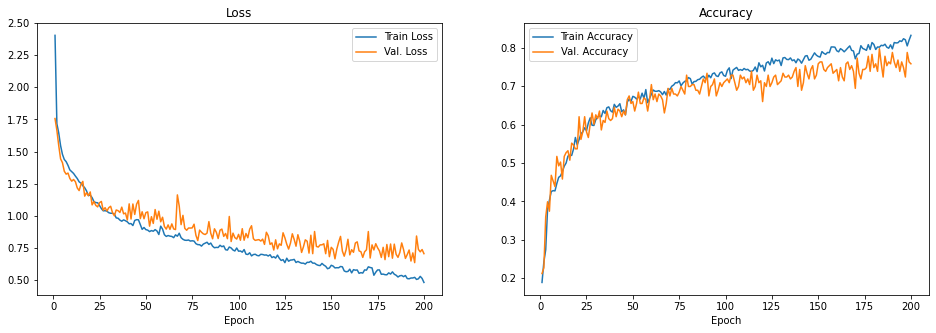

In [37]:
epoch=200

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history2.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history2.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history2.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

From the graph above, we can observe that there is still a minor exploding gradient problem for the validation set.

In [83]:
val_results2 = model2.evaluate(df_test_aug, verbose=0)
print(f'Validation Loss - Sequential API : {val_results2[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results2[1]:.4f}')
print('')
test_result2 = model2.evaluate(df_test_aug)
print('Test Loss - Sequential API : ', test_result2[0])
print('Test Accuracy - Sequential API : ', test_result2[1])

Validation Loss - Sequential API : 0.7357
Validation Accuracy - Sequential API : 0.7846

4/4 [==============================] - 2s 409ms/step - loss: 0.7357 - accuracy: 0.7846
Test Loss - Sequential API :  0.7357231974601746
Test Accuracy - Sequential API :  0.7845849990844727


The final Loss and Accuracy for Improved Base Model 01 has been improved from our original model, where it went from 1.05 loss and 0.65 / 65% accuracy to 0.736 loss and 0.78 / 78% for the test set. Even so, the loss may still be a little high, even though a loss of about 0.7 for a multi-class (especially that of six classes / categories) is still considered acceptable.

In [197]:
pred2 = model2.predict(df_test_aug)
pred2 = (pred2 > 0.5)

4/4 [==============================] - 1s 228ms/step


In [279]:
print(classification_report(test_final, pred2))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        67
           1       0.86      0.57      0.69       103
           2       0.73      0.74      0.74        74
           3       0.85      0.90      0.87       111
           4       0.86      0.68      0.76       113
           5       0.70      0.50      0.58        38

   micro avg       0.82      0.72      0.77       506
   macro avg       0.81      0.70      0.75       506
weighted avg       0.82      0.72      0.76       506
 samples avg       0.72      0.72      0.72       506



Improved Model 01 Summary:

- Class 0 F1-Score = 0.83 / 83% from 0.77 / 77% on original model
- Class 1 F1-Score = 0.69 / 69% from 0.34 / 34% on original model
- Class 2 F1-Score = 0.74 / 74% from 0.51 / 51% on original model
- Class 3 F1-Score = 0.87 / 87% from 0.71 / 71% on original model
- Class 4 F1-Score = 0.76 / 76% from 0.70 / 70% on original model
- Class 5 F1-Score = 0.58 / 58% from 0.25 / 25% on original model

*Reminder:

- Class 0 is Cardboard
- Class 1 is Glass
- Class 2 is Metal
- Class 3 is Paper
- Class 4 is Plastic
- Class 5 is Trash

#### 2. Base Model Improvement Version 02

From the lessons learned in the first version of our improved model, we would try switching back the optimizer to Adam for the second improvement model. In addition, looking at the loss graph of improved model version 01, we could see that the loss for the Train and Validation sets begins to diverge at about 50 epochs. Therefore, we have decreased the epoch from 200 to 50 for this model.

In [38]:
model5 = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [39]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [40]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [41]:
epochs=50

history5 = model5.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs
)

Epoch 1/50
15/15 [==============================] - 15s 941ms/step - loss: 1.7954 - accuracy: 0.2085 - val_loss: 1.5443 - val_accuracy: 0.3054
Epoch 2/50
15/15 [==============================] - 14s 940ms/step - loss: 1.4940 - accuracy: 0.3922 - val_loss: 1.3993 - val_accuracy: 0.4039
Epoch 3/50
15/15 [==============================] - 14s 947ms/step - loss: 1.3419 - accuracy: 0.4543 - val_loss: 1.2668 - val_accuracy: 0.4483
Epoch 4/50
15/15 [==============================] - 14s 934ms/step - loss: 1.3080 - accuracy: 0.4593 - val_loss: 1.2693 - val_accuracy: 0.5074
Epoch 5/50
15/15 [==============================] - 14s 938ms/step - loss: 1.2215 - accuracy: 0.5077 - val_loss: 1.1815 - val_accuracy: 0.5419
Epoch 6/50
15/15 [==============================] - 14s 941ms/step - loss: 1.1756 - accuracy: 0.5275 - val_loss: 1.2596 - val_accuracy: 0.5172
Epoch 7/50
15/15 [==============================] - 14s 941ms/step - loss: 1.1269 - accuracy: 0.5512 - val_loss: 1.1968 - val_accuracy: 0.5468

In [58]:
model5.trainable = False

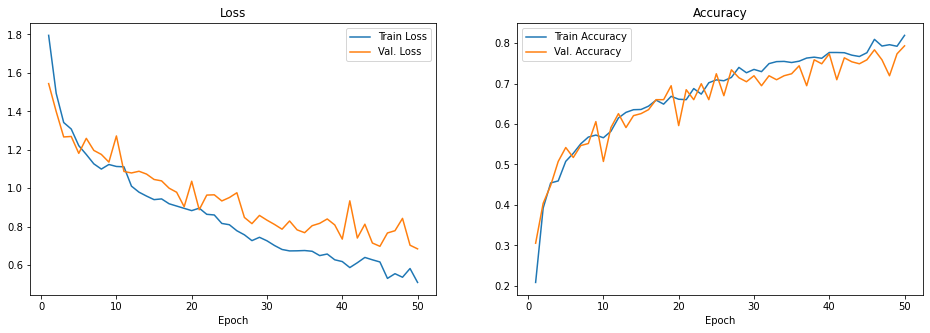

In [42]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history5.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history5.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history5.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history5.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Validation set still has minor exploding gradient problem.

In [84]:
val_results3 = model5.evaluate(df_test_aug, verbose=0)
print(f'Validation Loss - Sequential API : {val_results3[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results3[1]:.4f}')
print('')
test_result3 = model5.evaluate(df_test_aug)
print('Test Loss - Sequential API : ', test_result3[0])
print('Test Accuracy - Sequential API : ', test_result3[1])

Validation Loss - Sequential API : 0.7432
Validation Accuracy - Sequential API : 0.7431

4/4 [==============================] - 2s 365ms/step - loss: 0.7432 - accuracy: 0.7431
Test Loss - Sequential API :  0.7432494759559631
Test Accuracy - Sequential API :  0.7430830001831055


It can be concluded that our second improved model falls a bit short of the first one, where loss and accuracy went from 0.736 loss and 0.78 / 78% to 0.743 loss and 0.74 / 74% respectively. This is not bad considering that this model only uses 1/4 of the epochs from the first improved model, decreasing our train time and usage of computer resources considerably.

In [206]:
pred3 = model5.predict(df_test_aug)
pred3 = (pred3 > 0.5)

4/4 [==============================] - 1s 237ms/step


In [280]:
print(classification_report(test_final, pred3))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        67
           1       0.74      0.62      0.68       103
           2       0.67      0.65      0.66        74
           3       0.81      0.86      0.83       111
           4       0.87      0.64      0.73       113
           5       0.73      0.63      0.68        38

   micro avg       0.79      0.70      0.74       506
   macro avg       0.79      0.70      0.74       506
weighted avg       0.79      0.70      0.74       506
 samples avg       0.70      0.70      0.70       506



Improved Model 02 Summary:

- Class 0 F1-Score = 0.84 / 84% from 0.83 / 83% on Improved Model Version 01
- Class 1 F1-Score = 0.68 / 68% from 0.69 / 69% on Improved Model Version 01
- Class 2 F1-Score = 0.66 / 66% from 0.74 / 74% on Improved Model Version 01
- Class 3 F1-Score = 0.83 / 83% from 0.87 / 87% on Improved Model Version 01
- Class 4 F1-Score = 0.73 / 73% from 0.76 / 76% on Improved Model Version 01
- Class 5 F1-Score = 0.68 / 68% from 0.58 / 58% on Improved Model Version 01

*Reminder:

- Class 0 is Cardboard
- Class 1 is Glass
- Class 2 is Metal
- Class 3 is Paper
- Class 4 is Plastic
- Class 5 is Trash

#### 3. Base Model Improvement Version 03

Not satisfied with the results of the version 02, we move on to version 03, where the optimizer is changed back (again) to Adamax and the epoch is incresed to 300. Originally, a callback was used for the model training here but has since been removed due to it stopping the training too early, hence not producing any improvements.

In [43]:
model9 = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [44]:
model9.compile(optimizer='adamax',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 64)      

In [47]:
epochs=300

history9 = model9.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs
)

Epoch 1/300
15/15 [==============================] - 15s 1s/step - loss: 2.3557 - accuracy: 0.1991 - val_loss: 1.7460 - val_accuracy: 0.1724
Epoch 2/300
15/15 [==============================] - 14s 944ms/step - loss: 1.7167 - accuracy: 0.2382 - val_loss: 1.6797 - val_accuracy: 0.2118
Epoch 3/300
15/15 [==============================] - 14s 930ms/step - loss: 1.6703 - accuracy: 0.2591 - val_loss: 1.6094 - val_accuracy: 0.2709
Epoch 4/300
15/15 [==============================] - 14s 949ms/step - loss: 1.5933 - accuracy: 0.3454 - val_loss: 1.5150 - val_accuracy: 0.3399
Epoch 5/300
15/15 [==============================] - 14s 932ms/step - loss: 1.5222 - accuracy: 0.3922 - val_loss: 1.4288 - val_accuracy: 0.3990
Epoch 6/300
15/15 [==============================] - 14s 949ms/step - loss: 1.4588 - accuracy: 0.3955 - val_loss: 1.4330 - val_accuracy: 0.3399
Epoch 7/300
15/15 [==============================] - 14s 931ms/step - loss: 1.4111 - accuracy: 0.4389 - val_loss: 1.3886 - val_accuracy: 0.

In [59]:
model9.trainable = False

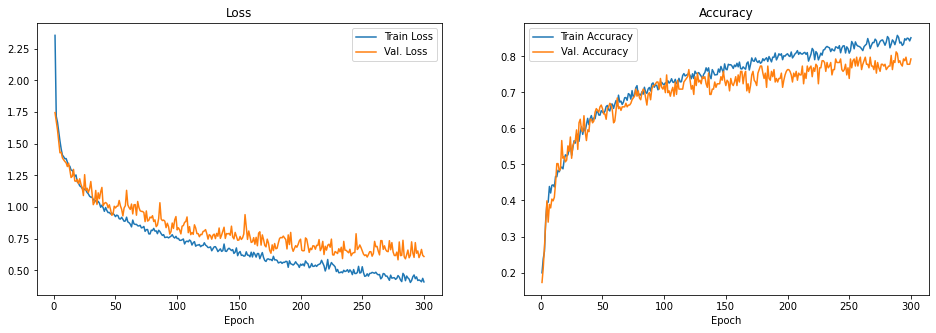

In [48]:
epoch=300

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history9.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history9.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history9.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history9.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Minor exploding gradient problem still persists with Train set now exhibiting it as well.

In [85]:
val_results4 = model9.evaluate(df_test_aug, verbose=0)
print(f'Validation Loss - Sequential API : {val_results4[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results4[1]:.4f}')
print('')
test_result4 = model9.evaluate(df_test_aug)
print('Test Loss - Sequential API : ', test_result4[0])
print('Test Accuracy - Sequential API : ', test_result4[1])

Validation Loss - Sequential API : 0.7283
Validation Accuracy - Sequential API : 0.7964

4/4 [==============================] - 2s 419ms/step - loss: 0.7283 - accuracy: 0.7964
Test Loss - Sequential API :  0.7282984256744385
Test Accuracy - Sequential API :  0.7964426875114441


Since improved model version 02 has decreased performance in terms of loss and accuracy, we will be comparing model version 03 with that of version 01. Therefore, we can observe that the final Loss and Accuracy has improved from 0.736 loss and 0.78 / 78% to 0.728 loss and about 0.80 / 80% for the test set.

In [287]:
pred4 = model9.predict(df_test_aug)
pred4 = (pred4 > 0.5)

4/4 [==============================] - 1s 275ms/step


In [288]:
print(classification_report(test_final, pred4))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        67
           1       0.78      0.63      0.70       103
           2       0.75      0.72      0.73        74
           3       0.87      0.86      0.86       111
           4       0.83      0.73      0.78       113
           5       0.67      0.58      0.62        38

   micro avg       0.82      0.74      0.78       506
   macro avg       0.80      0.73      0.76       506
weighted avg       0.81      0.74      0.77       506
 samples avg       0.74      0.74      0.74       506



Improved Model 03 Summary:

- Class 0 F1-Score = 87% from 83% (Version 01) and 84% (Version 02)
- Class 1 F1-Score = 70% from 69% (Version 01) and 68% (Version 02)
- Class 2 F1-Score = 73% from 74% (Version 01) and 66% (Version 02)
- Class 3 F1-Score = 86% from 87% (Version 01) and 83% (Version 02)
- Class 4 F1-Score = 78% from 76% (Version 01) and 73% (Version 02)
- Class 5 F1-Score = 62% from 58% (Version 01) and 68% (Version 02)

*Reminder:

- Class 0 is Cardboard
- Class 1 is Glass
- Class 2 is Metal
- Class 3 is Paper
- Class 4 is Plastic
- Class 5 is Trash

#### 4. Base Model Improvement Version 04

Believing our model could still be improved, we make our final improvements here, only changing the epoch, increasing it from 300 to 500.

In [49]:
model10 = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [50]:
model10.compile(optimizer='adamax',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [52]:
epochs=500

history10 = model10.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs
)

Epoch 1/500
15/15 [==============================] - 16s 992ms/step - loss: 2.0778 - accuracy: 0.2266 - val_loss: 1.7422 - val_accuracy: 0.2118
Epoch 2/500
15/15 [==============================] - 15s 980ms/step - loss: 1.6620 - accuracy: 0.2371 - val_loss: 1.6082 - val_accuracy: 0.2217
Epoch 3/500
15/15 [==============================] - 15s 985ms/step - loss: 1.5528 - accuracy: 0.3482 - val_loss: 1.4951 - val_accuracy: 0.3547
Epoch 4/500
15/15 [==============================] - 15s 996ms/step - loss: 1.4860 - accuracy: 0.4021 - val_loss: 1.4578 - val_accuracy: 0.3941
Epoch 5/500
15/15 [==============================] - 15s 999ms/step - loss: 1.4178 - accuracy: 0.4505 - val_loss: 1.3553 - val_accuracy: 0.4138
Epoch 6/500
15/15 [==============================] - 15s 996ms/step - loss: 1.3820 - accuracy: 0.4521 - val_loss: 1.3448 - val_accuracy: 0.4631
Epoch 7/500
15/15 [==============================] - 15s 1s/step - loss: 1.3527 - accuracy: 0.4670 - val_loss: 1.3333 - val_accuracy: 0.

In [53]:
model10.trainable = False

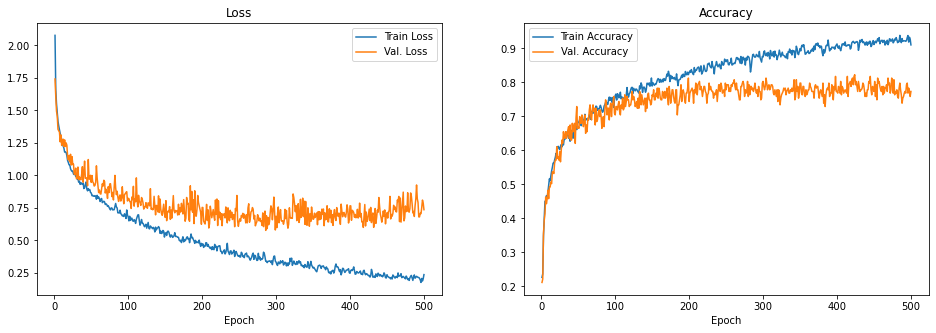

In [54]:
epoch=500

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history10.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history10.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history10.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history10.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

The Train and Validation sets both exhibit minor exploding gradient problems. In addition, with 500 epochs, we could begin to observe that the gradients starts to get smaller and smaller (especially for the Validation set) as the algorithm progresses down to the lower layers. As a result, the gradient descent update leaves the lower layers' connection weights virtually unchanged, gradually lessening improvements of results.

In [55]:
val_results5 = model10.evaluate(df_test_aug, verbose=0)
print(f'Validation Loss - Sequential API : {val_results5[0]:.5f}')
print(f'Validation Accuracy - Sequential API : {val_results5[1]:.5f}')
print('')
test_result5 = model10.evaluate(df_test_aug)
print('Test Loss - Sequential API : ', test_result5[0])
print('Test Accuracy - Sequential API : ', test_result5[1])

Validation Loss - Sequential API : 0.65334
Validation Accuracy - Sequential API : 0.82213

4/4 [==============================] - 1s 219ms/step - loss: 0.6533 - accuracy: 0.8221
Test Loss - Sequential API :  0.6533438563346863
Test Accuracy - Sequential API :  0.8221343755722046


This final improved model (version 04) will be compared to the version 3. Therefore, in terms of loss and accuracy, we can ascertain that the final Loss and Accuracy has improved from 0.728 loss and about 0.80 / 80% to 0.653 loss and 0.82 / 82% for the test set.

In [56]:
pred5 = model10.predict(df_test_aug)
pred5 = (pred5 > 0.5)

4/4 [==============================] - 1s 221ms/step


In [57]:
print(classification_report(test_final, pred5))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.83      0.72      0.77       103
           2       0.84      0.76      0.79        74
           3       0.87      0.93      0.90       111
           4       0.83      0.88      0.85       113
           5       0.79      0.61      0.69        38

   micro avg       0.84      0.82      0.83       506
   macro avg       0.83      0.79      0.81       506
weighted avg       0.84      0.82      0.82       506
 samples avg       0.82      0.82      0.82       506



Improved Model 04 Summary:

- Class 0 F1-Score = 85% from 83% (Version 01), 84% (Version 02), and 87% (Version 03)
- Class 1 F1-Score = 77% from 69% (Version 01), 68% (Version 02), and 70% (Version 03)
- Class 2 F1-Score = 79% from 74% (Version 01), 66% (Version 02), and 73% (Version 03)
- Class 3 F1-Score = 90% from 87% (Version 01), 83% (Version 02), and 86% (Version 03)
- Class 4 F1-Score = 85% from 76% (Version 01), 73% (Version 02), and 78% (Version 03)
- Class 5 F1-Score = 69% from 58% (Version 01), 68% (Version 02), and 62% (Version 03)

As such, we can conclude that this final improved model is best in terms of Test set Loss, Accuracy, and F1-Score.

*Reminder:

- Class 0 is Cardboard
- Class 1 is Glass
- Class 2 is Metal
- Class 3 is Paper
- Class 4 is Plastic
- Class 5 is Trash

#### 5. Closing Statement

As a closing statement for the improvement of our base model, I would like to add the following:

- Even though we have a minor exploding gradient for all our models, weight regularization and clipping is not added because it decreases / affects the accuracy and fit of our models.
- Dropout was not added because our models are not overfitting, and also because if affects the performance of our model.
- Weight initializer and batch normalization not added because we are not encountering a vanishing gradient problem and also because if affects the performance of our model.
- Activation function remains unchanged because "Relu" remains the best to be used so far.
- More convolutional, pooling, and/or hidden layers decreases / affects the accuracy and fit of our models.
- The number of neurons chosen in the improvement models above produces the best model so far.

Last improved model is labelled as "model10" after 10 iterations from the similar model has been made, tested, tweaked, and retested numerous times. These last four improved models we have above remains the best for comparisons.

### b. Pretrained Model

VGG-16 was considered for use to improve from our original model. However, after numerous experimentation and tweaks, the results of using this model are as follows:

VGG-16 Model 1: 

- AdaMax with clipping=0.1 and learning rate=0.001, loss categorical_crossentropy, metrics=accuracy

- One hidden layer at 128 neurons, activation relu, no kernel initializer and regularization

- Output layer at 6 neurons, activation softmax

- Results = Vanishing Gradient at 0.25 acc for train and val.

VGG-16 Model 2: 

- AdaMax same as above

- One hidden layer same as above
- One batch normalization layer
- one dropout layer at 0.2

- Output layer same as above

- Results = Great train accuracy, but overwhelmingly poor val accuracy. Model is severly overfit.

VGG-16 Model 3: 

- SGD with same parameters as above

- One hidden layer same as above

- Output layer same as above

- Results = Vanishing gradient at 0.15 acc for train and val.

VGG-16 Model 4: 

- RMSprop with clipping=0.1 and learning rate=0.001, loss categorical_crossentropy, metrics=accuracy

- One hidden layer at 128 neurons, activation relu, kernel ini=HeNormal and no regu

- Output layer at 6 neurons, activation softmax

- Results = Vanishing gradient at 0.25 acc for train and val.

VGG-16 Model 5: 

- Adam with clipping=0.1 and learning rate=0.001, loss categorical_crossentropy, metrics=accuracy

- One hidden layer at 128 neurons, activation relu, kernel ini=HeNormal and kernel regu=l2

- Output layer at 6 neurons, activation softmax

- Results = Vanishing gradient for val acc.

VGG-16 Model 6: 

- Adam with NO CLIPPING, learning rate=0.001, loss categorical_crossentropy, metrics=accuracy

- One hidden layer at 128 neurons, activation relu, kernel ini=HeNormal and kernel regu=l2

- Output layer at 6 neurons, activation softmax

- Results = Overfit. Val acc not increasing / vanishing.

In conclusion, VGG-16 was not used in the end.

## X. Model Inference

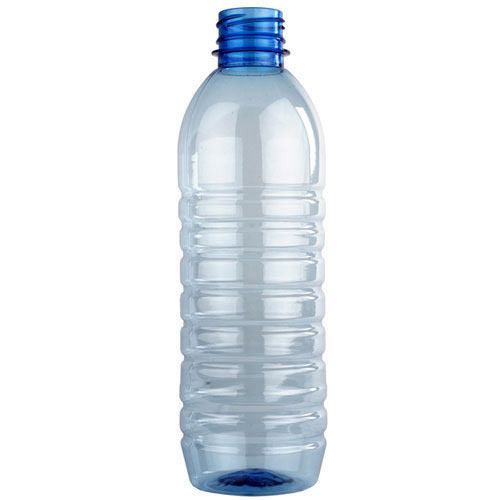

In [42]:
# Loading inference image.
img = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\empty-plastic-bottles-500x500.jpg')
img

In [43]:
# Converting inference image to numpy array.
img = np.array(img)

In [74]:
# Rescaling inference image.
img_rescale = img/255

In [45]:
# Resizing inference image.
img_resize = cv2.resize(img_rescale, (224, 224))

In [46]:
df_test_aug.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [60]:
# Predicting classification of inference image.
inf = model10.predict(np.array([img_resize]))
print(np.argmax(inf))

1/1 [==============================] - 0s 63ms/step
3


The prediction is not quite right as the picture is supposed to be classified as "plastic."

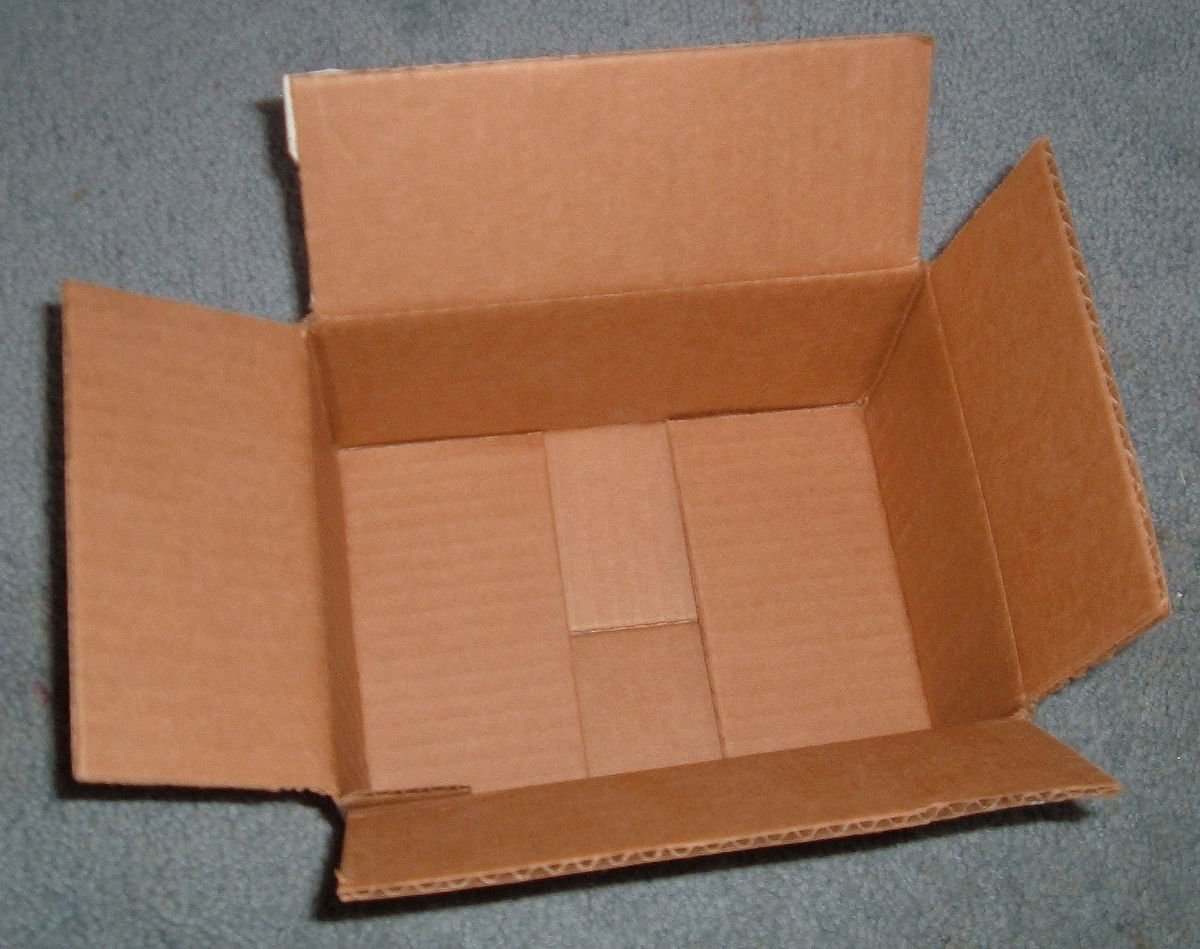

In [62]:
img2 = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\cardboard box.jpg')
img2

In [63]:
img2 = np.array(img2)

In [64]:
img_rescale2 = img2/255

In [65]:
img_resize2 = cv2.resize(img_rescale2, (224, 224))

In [66]:
df_test_aug.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [67]:
inf2 = model10.predict(np.array([img_resize2]))
print(np.argmax(inf2))

1/1 [==============================] - 0s 106ms/step
0


This time, the model is able to predict and classify an image of a cardboard box correctly as cardboard type waste.

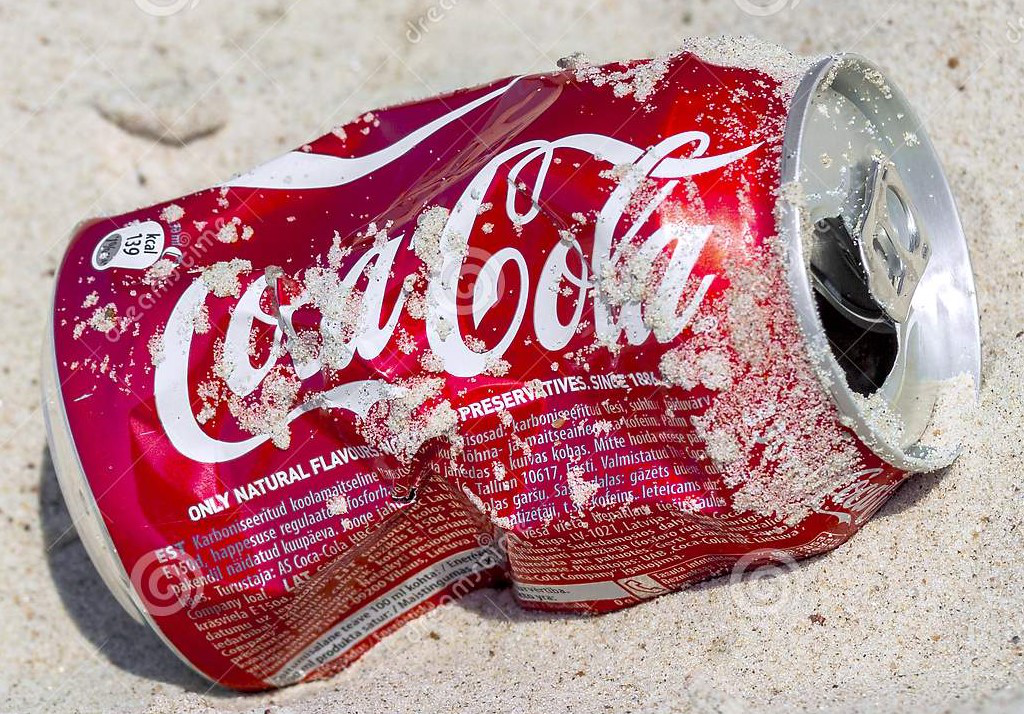

In [68]:
img3 = Image.open(r'C:\Users\radya\OneDrive\Desktop\Hacktiv8\H8-Assignments-Bay\p2---ftds-001-hck--ml2-Radyatra\coca-cola-can.jpg')
img3

In [69]:
img3 = np.array(img3)

In [70]:
img_rescale3 = img2/255

In [71]:
img_resize3 = cv2.resize(img_rescale3, (224, 224))

In [72]:
df_test_aug.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [73]:
inf3 = model10.predict(np.array([img_resize3]))
print(np.argmax(inf3))

1/1 [==============================] - 0s 23ms/step
0


Perhaps the background has made the model think that this image is that of a cardboard. As such, further improvements to the model may be needed.

## XI. Model Saving

In [ ]:
# Saving CNN model
model2.save('ml2p2_cnn1.h5')

In [ ]:
model5.save('ml2p2_cnn2.h5')

In [ ]:
model9.save('ml2p2_cnn3.h5')

In [61]:
model10.save('ml2p2_cnn4.h5')

## XII. Conclusion & Recommendation

To recall, the objective of this notebook is to create a Convolutional Neural Network (CNN) model in which the model could classify waste images into six categories: Cardboard, Glass, Metal, Paper, Plastic, and Trash. In conclusion, a Sequential API CNN model with the following settings works best: (See Chapter IX, Subchapter a, Part 4 for details).

The performance results of the model is as follows: 

- Class 0 (Cardboard) F1-Score = 0.85 / 85%
- Class 1 (Glass) F1-Score = 0.77 / 77%
- Class 2 (Metal) F1-Score = 0.79 / 79%
- Class 3 (Paper) F1-Score = 0.90 / 90%
- Class 4 (Plastic) F1-Score = 0.85 / 85%
- Class 5 (Trash) F1-Score = 0.69 / 69%
- Test Loss = 0.653 
- Test Accuracy = 0.82 / 82%

As a recommendation, further tuning could be done to increase the performance of the model and/or decrease the burden on training time and computer resources. As such, the following may be done to meet these improvements:

- Increase the number of sample images.
- Make tweaks in the Data / Image Augmentation
- Experiment with number of layers and neurons.
- Experiment with layer placement before and after flattening.
- Experiment with using parameters left out in this notebook (Batch Normalization, Dropout, Kernel Initializer, Kernel Regularizer, etc.)
- Experiment more with the VGG-16 or other Pretrained models.